In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import itertools
from astropy.io import fits
import scipy
import pickle
import pymaster as nmt
from planck_util import *

In [3]:
freqs = ['100', '143', '217']
splits = ['1', '2']
channels = [ 'TT', 'TE', 'EE' ]
result_dict = {}
Bbl_dict = {}

ps = PlanckSpectra()

In [ ]:
%%time
for f1,f2 in itertools.product(freqs, repeat=2):
    for s1,s2 in itertools.product(splits, repeat=2):
        if not (( f1, f2, s1, s2 ) in result_dict):
            print( f1, f2, s1, s2 )
            Cb = ps.compute(f1, f2, s1, s2)
            result_dict[( f1, f2, s1, s2 )] = Cb
            Bbl_dict[( f1, f2, s1, s2 )] = ps.get_Bbl_from_last_workspace()

100 100 1 1


/home/zequnl/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:371: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


In [6]:
with open('Cb.pickle', 'wb') as handle:
    pickle.dump(result_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('Bbl.pickle', 'wb') as handle:
    pickle.dump(Bbl_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

---

# Testing

In [4]:
with open('Cb.pickle', 'rb') as handle:
    Cb = pickle.load(handle)

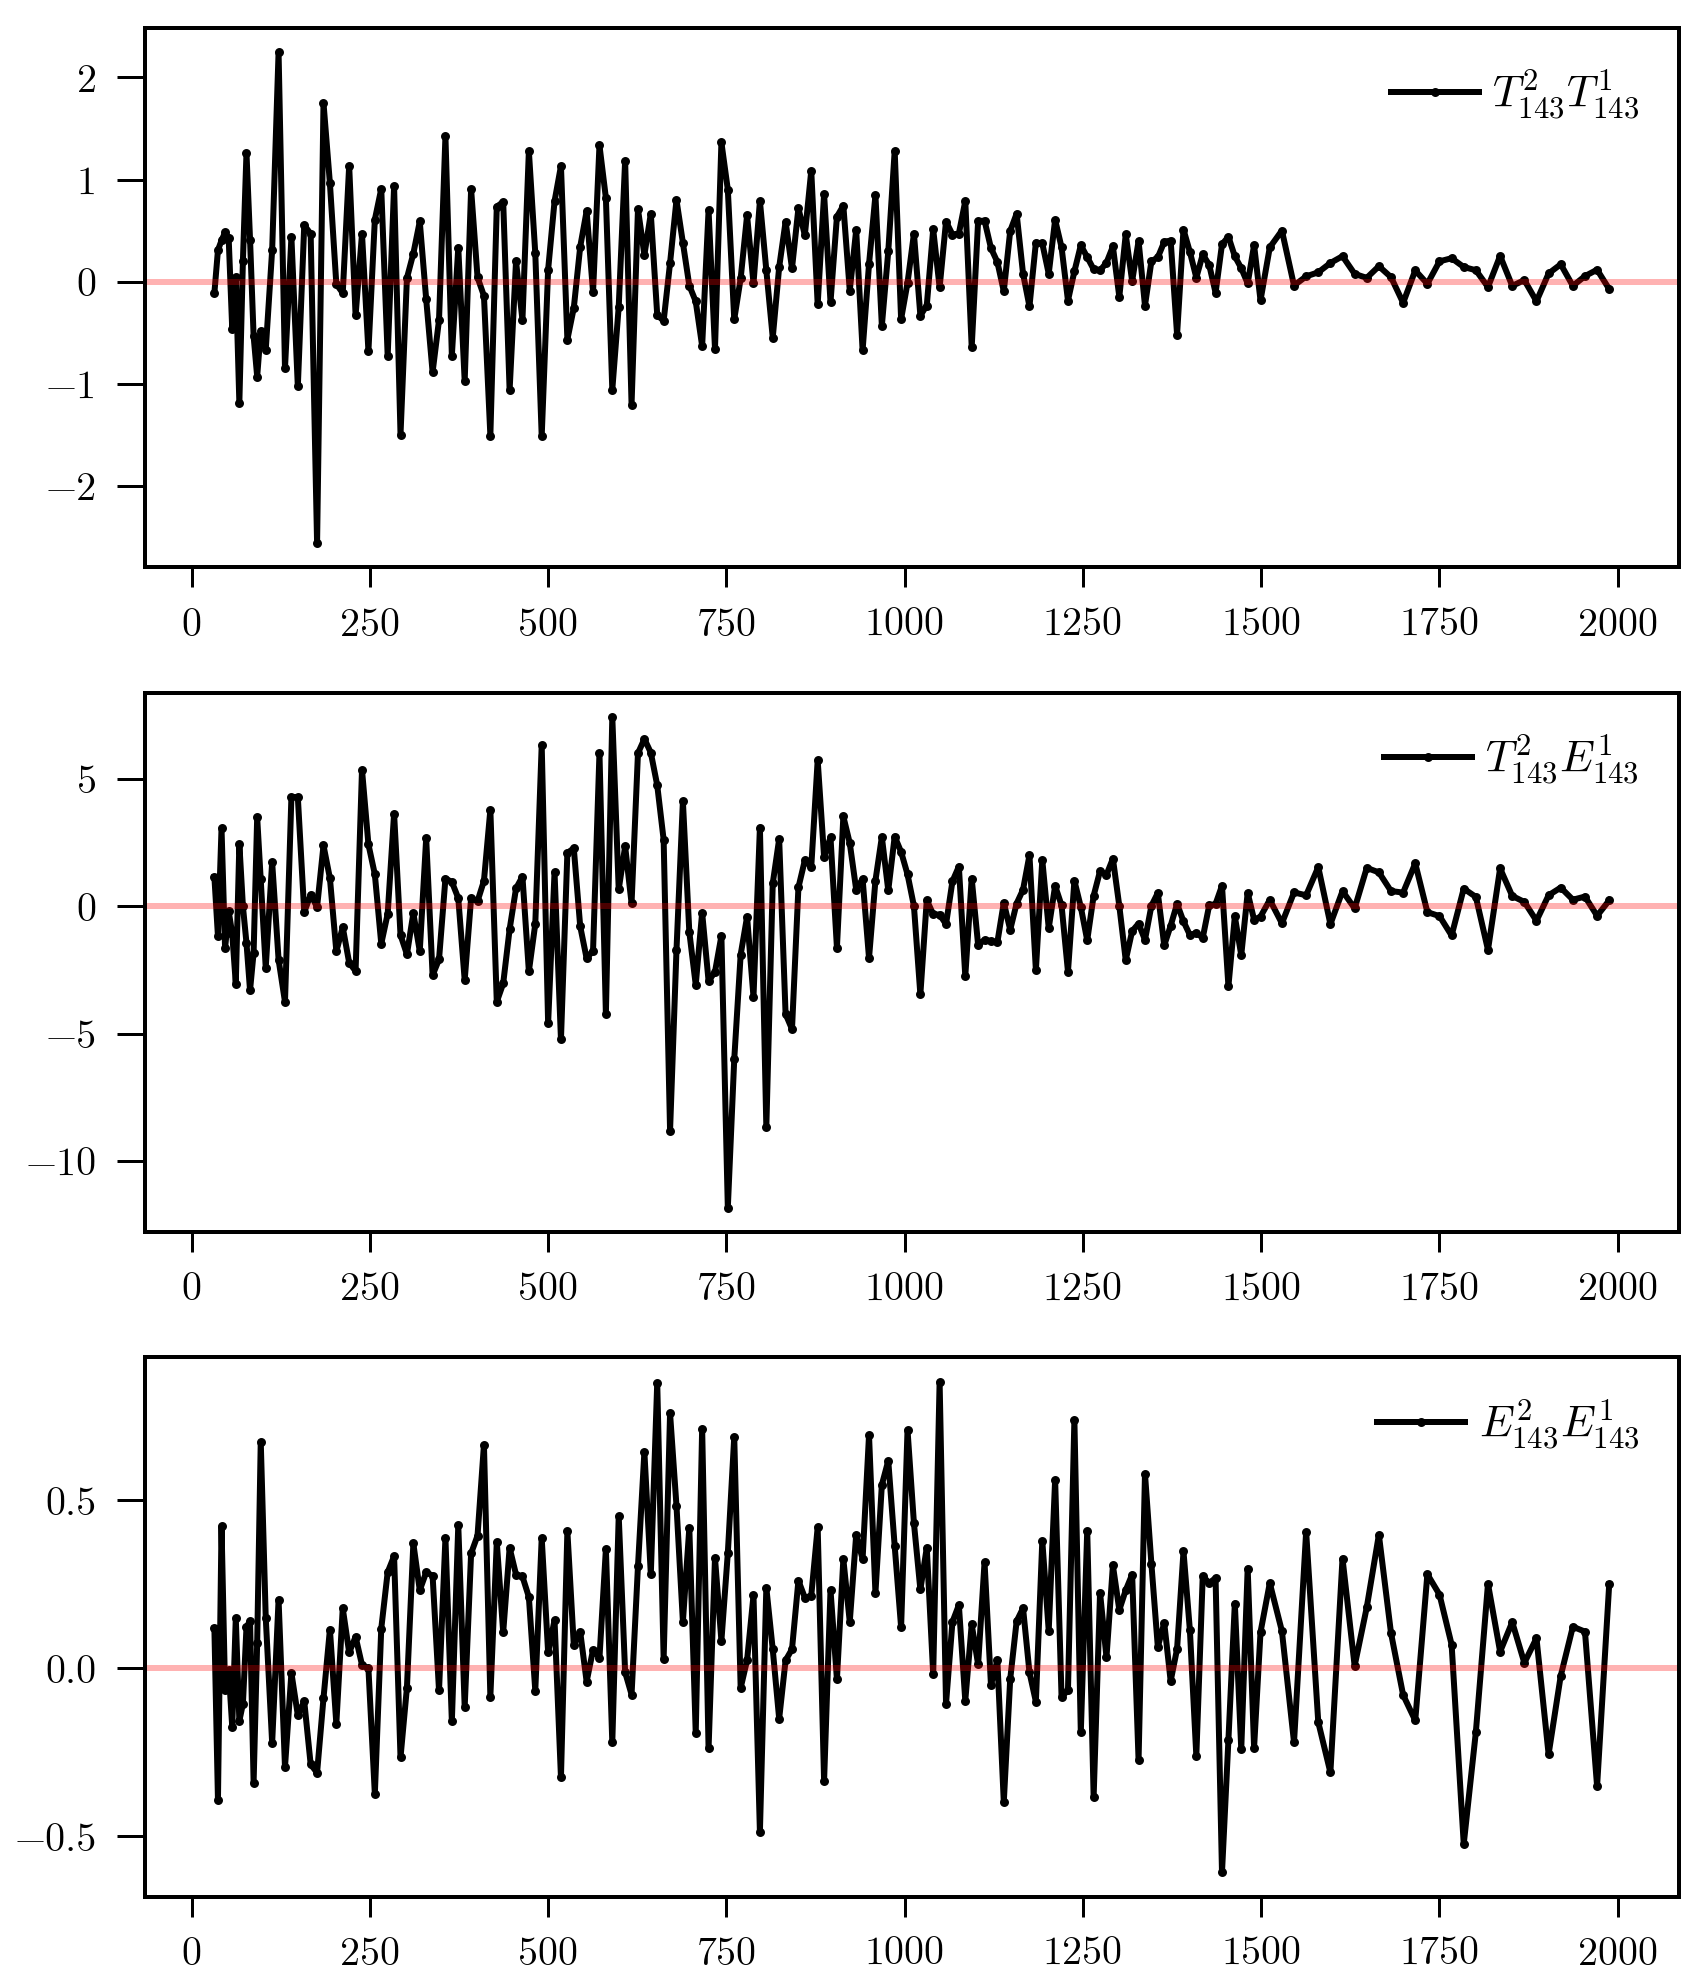

In [5]:

fig, axes = plt.subplots(3,1,figsize=(12,14))

f1, f2, s1, s2 = '143', '143', '2', '1'

for spec, ax in zip(['TT', 'TE', 'EE'], axes):
    lmin_,lmax_,l_ref,cl_ref,error_ref=np.loadtxt('../planck_spectra/spectra_' + f'{spec}_{f1}x{f2}' + '.dat',unpack=True)
    dl_ref_fac = l_ref*(l_ref+1)/(2*np.pi)

    dl = np.interp(x=l_ref, xp=ps.lb, fp=Cb[f1, f2, s1, s2][spec] * 1e12) 
    ax.plot(l_ref, (dl - (cl_ref * dl_ref_fac)) / (error_ref * dl_ref_fac), 
            'k.-', 
            label=( '$' + spec[0] + '_{' + f1 + '}^{' + 
                   s1 + '}' + spec[1] + '_{' + f2 + '}^{' + s2 + '}$'))
    ax.axhline(0, color='red', alpha=0.3)
#     ax.set_ylim(-3,3)
    ax.legend()
    

fig.tight_layout()

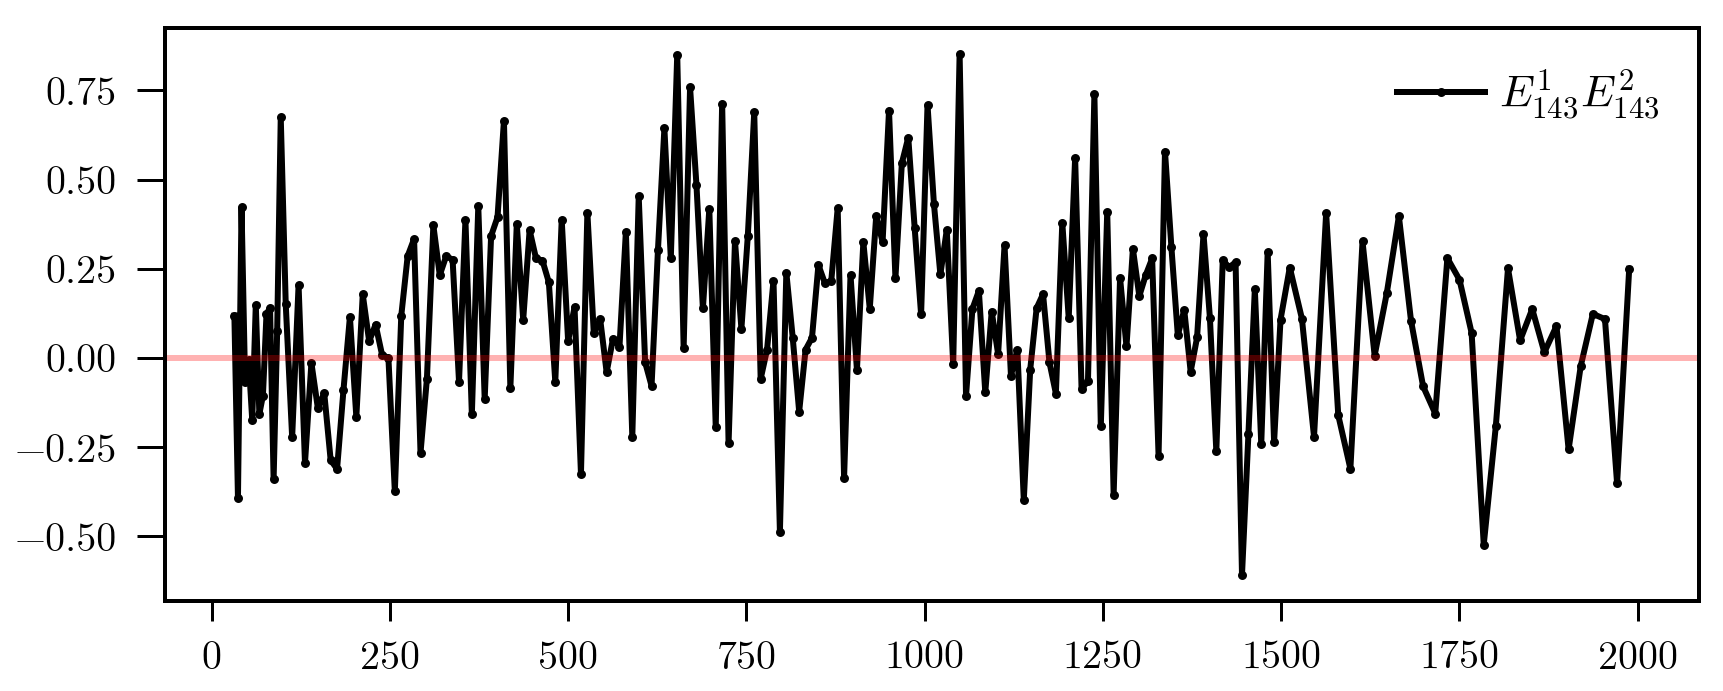

In [6]:

fig, axes = plt.subplots(1,1,figsize=(12,5))

f1, f2, s1, s2 = '143', '143', '1', '2'

for spec, ax in zip(['EE'], [axes]):
    lmin_,lmax_,l_ref,cl_ref,error_ref=np.loadtxt('../planck_spectra/spectra_' + f'{spec}_{f1}x{f2}' + '.dat',unpack=True)
    dl_ref_fac = l_ref*(l_ref+1)/(2*np.pi)

    dl = np.interp(x=l_ref, xp=ps.lb, fp=Cb[f1, f2, s1, s2][spec] * 1e12) 
    ax.plot(l_ref, (dl - (cl_ref * dl_ref_fac)) / (error_ref * dl_ref_fac), 
            'k.-', 
            label=( '$' + spec[0] + '_{' + f1 + '}^{' + 
                   s1 + '}' + spec[1] + '_{' + f2 + '}^{' + s2 + '}$'))
    ax.axhline(0, color='red', alpha=0.3)
#     ax.set_ylim(-3,3)
    ax.legend()
    

fig.tight_layout()

# Test the $B_{bl}$

In [24]:
par = ('143', '143', '2', '2')
test_spin = 'TT'

def convert_str(sp):
    return [0 if x=='T'  else 2 for x in sp]
sp1, sp2 = convert_str(test_spin)

pspy_bbl = np.load(f'../mcm/{par[0]}x{par[1]}_hm{par[2]}xhm{par[3]}_Bbl_spin{sp1}xspin{sp2}.npy')

with open('Bbl.pickle', 'rb') as handle:
    Bbl = pickle.load(handle)

nmt_bbl = Bbl[par][int((sp1+sp2)/2)]

In [25]:
pspy_bbl = pspy_bbl[:215, :2600]

In [26]:
10400/4

2600.0

(10, 60)

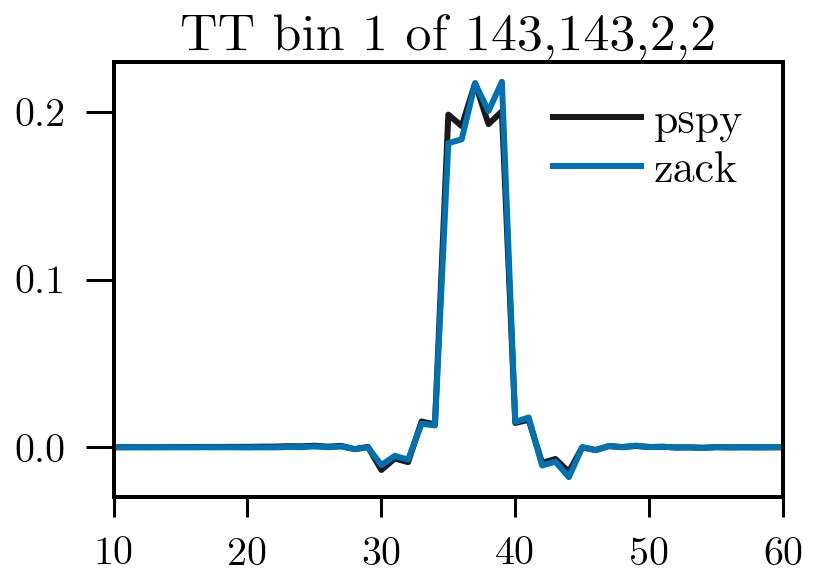

In [27]:
bin_n = 1
plt.title(f'{test_spin} bin {bin_n} of ' + ','.join(par) )
plt.plot( np.arange(2600)+2, pspy_bbl[bin_n,:], label='pspy' )
plt.plot( nmt_bbl[6+bin_n,:], label='zack' )
plt.legend()
plt.xlim(10,60)

(25, 50)

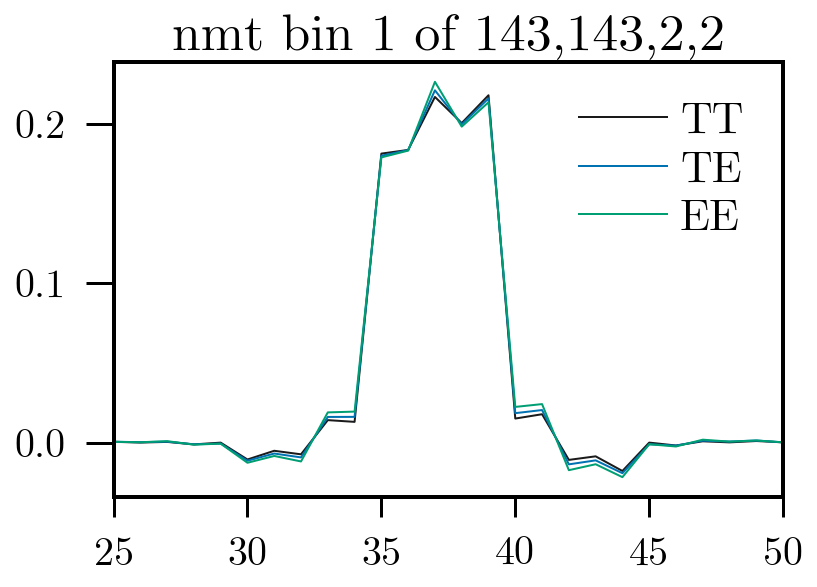

In [28]:
bin_n = 1
plt.title(f'nmt bin {bin_n} of ' + ','.join(par) )

nmt_bbl = Bbl[par][0]
plt.plot( nmt_bbl[6+bin_n,:], label='TT', lw=1 )

nmt_bbl = Bbl[par][1]
plt.plot( nmt_bbl[6+bin_n,:], label='TE', lw=1 )

nmt_bbl = Bbl[par][2]
plt.plot( nmt_bbl[6+bin_n,:], label='EE', lw=1 )

plt.legend()
plt.xlim(25,50)

(25, 50)

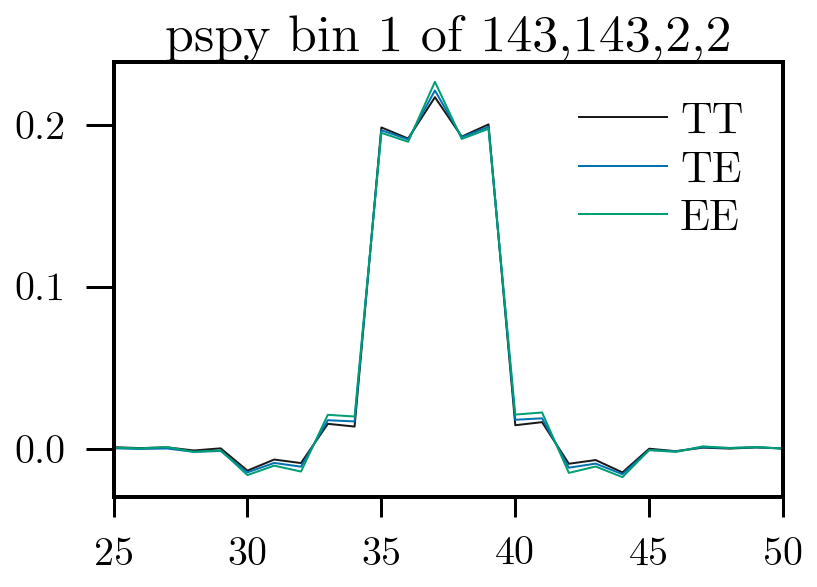

In [29]:
bin_n = 1
plt.title(f'pspy bin {bin_n} of ' + ','.join(par) )

sp1, sp2 = convert_str('TT')
pspy_bbl = np.load(f'../mcm/{par[0]}x{par[1]}_hm{par[2]}xhm{par[3]}_Bbl_spin{sp1}xspin{sp2}.npy')
pspy_bbl = pspy_bbl[:215, :2600]
plt.plot( np.arange(2600)+2, pspy_bbl[bin_n,:], label='TT', lw=1 )

sp1, sp2 = convert_str('TE')
pspy_bbl = np.load(f'../mcm/{par[0]}x{par[1]}_hm{par[2]}xhm{par[3]}_Bbl_spin{sp1}xspin{sp2}.npy')
pspy_bbl = pspy_bbl[:215, :2600]
plt.plot( np.arange(2600)+2, pspy_bbl[bin_n,:], label='TE', lw=1 )

sp1, sp2 = convert_str('EE')
pspy_bbl = np.load(f'../mcm/{par[0]}x{par[1]}_hm{par[2]}xhm{par[3]}_Bbl_spin{sp1}xspin{sp2}.npy')
pspy_bbl = pspy_bbl[:215, :2600]
plt.plot( np.arange(2600)+2, pspy_bbl[bin_n,:], label='EE', lw=1 )

plt.legend()
plt.xlim(25,50)

# Stitch Together the Big Vector

In [13]:
from astropy.io import ascii

cross_spec_list = ascii.read('../cross_spectra.dat', delimiter=',', format='commented_header')

In [14]:
Bbl.keys()

dict_keys([('100', '100', '1', '1'), ('100', '100', '1', '2'), ('100', '100', '2', '1'), ('100', '100', '2', '2'), ('100', '143', '1', '1'), ('100', '143', '1', '2'), ('100', '143', '2', '1'), ('100', '143', '2', '2'), ('100', '217', '1', '1'), ('100', '217', '1', '2'), ('100', '217', '2', '1'), ('100', '217', '2', '2'), ('143', '100', '1', '1'), ('143', '100', '1', '2'), ('143', '100', '2', '1'), ('143', '100', '2', '2'), ('143', '143', '1', '1'), ('143', '143', '1', '2'), ('143', '143', '2', '1'), ('143', '143', '2', '2'), ('143', '217', '1', '1'), ('143', '217', '1', '2'), ('143', '217', '2', '1'), ('143', '217', '2', '2'), ('217', '100', '1', '1'), ('217', '100', '1', '2'), ('217', '100', '2', '1'), ('217', '100', '2', '2'), ('217', '143', '1', '1'), ('217', '143', '1', '2'), ('217', '143', '2', '1'), ('217', '143', '2', '2'), ('217', '217', '1', '1'), ('217', '217', '1', '2'), ('217', '217', '2', '1'), ('217', '217', '2', '2')])

# Generate Recipe 
We store the recipe in `ch_dict`

In [15]:
def get_ind(spec):
    if spec == 'TT':
        return 0
    elif spec == 'TE' or spec == 'ET':
        return 1
    else:
        return 2

In [37]:
import itertools

splits = ['1', '2']

total_recipe = []
bin_recipe = []
Bbl_recipe = []

for r in cross_spec_list:
    
    ch1, ch2 = r['spec'][0], r['spec'][1]
    f1, f2 = r['f1'], r['f2']
    bin_filt = np.logical_and( ps.lb > r['lmin'], ps.lb < r['lmax'] )
    bin_recipe.append(ps.lb[bin_filt])

    bbls = []
    specs = {}
    for f1, f2 in ( (r['f1'], r['f2']), (r['f2'], r['f1']) ):
        for s1,s2 in itertools.product(splits, repeat=2):
            auto_contains_noise = (f1 == f2 and s1 == s2)
            is_auto = (s1==s2)
            splitkey = (ch1, f1, s1, ch2, f2, s2)
            flipped_splitkey = (ch2, f2, s2, ch1, f1, s1)
            
            if not ((splitkey in specs ) or
                    (flipped_splitkey in specs )
                    or auto_contains_noise or is_auto): # NO AUTOS
                
                spec = Cb[str(f1), str(f2), str(s1), str(s2)][str(ch1)+str(ch2)]
                specs[splitkey] = spec[bin_filt]
                bbls.append(Bbl[str(f1), str(f2), str(s1), str(s2)][get_ind(ch1+ch2)][bin_filt,:])
                print( ch1, f1, s1, ch2, f2, s2 )
    
    average_spec = np.mean(np.array([specs[s] for s in specs]), axis=0)
    total_recipe.append( average_spec )
    
    average_bbl = np.mean(np.array(bbls), axis=0)
    np.save(f"nmtbbl/bbl_{ch1}{ch2}_{r['f1']}x{r['f2']}", average_bbl)
    np.savetxt(f"bbltxt/bbl_{ch1}{ch2}_{r['f1']}x{r['f2']}.txt", average_bbl)
#     Bbl_recipe.append( average_bbl )
    print('--')

T 100 1 T 100 2
--
T 143 1 T 143 2
--
T 143 1 T 217 2
T 143 2 T 217 1
--
T 217 1 T 217 2
--
E 100 1 E 100 2
--
E 100 1 E 143 2
E 100 2 E 143 1
--
E 100 1 E 217 2
E 100 2 E 217 1
--
E 143 1 E 143 2
--
E 143 1 E 217 2
E 143 2 E 217 1
--
E 217 1 E 217 2
--
T 100 1 E 100 2
T 100 2 E 100 1
--
T 100 1 E 143 2
T 100 2 E 143 1
T 143 1 E 100 2
T 143 2 E 100 1
--
T 100 1 E 217 2
T 100 2 E 217 1
T 217 1 E 100 2
T 217 2 E 100 1
--
T 143 1 E 143 2
T 143 2 E 143 1
--
T 143 1 E 217 2
T 143 2 E 217 1
T 217 1 E 143 2
T 217 2 E 143 1
--
T 217 1 E 217 2
T 217 2 E 217 1
--


In [17]:
mega_vector = (np.hstack(total_recipe) * 1e12)
np.savetxt('vec_all_spectra_nmt.dat', mega_vector)

In [18]:
planck = np.genfromtxt('../planck_spectra/vec_all_spectra.dat')

In [36]:
! mkdir bbltxt

In [19]:
planck_dl = planck[:,1] *  planck[:,0] * (planck[:,0]+1) / 2 / np.pi 
planck_dl_err = planck[:,2] *  planck[:,0] * (planck[:,0]+1) / 2 / np.pi 

In [20]:
col =  plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(0, 0.5, '$(C_{\\ell}^{\\mathrm{Planck}} - C_{\\ell}^{nmt}) / \\sigma^{\\mathrm{Planck}}$')

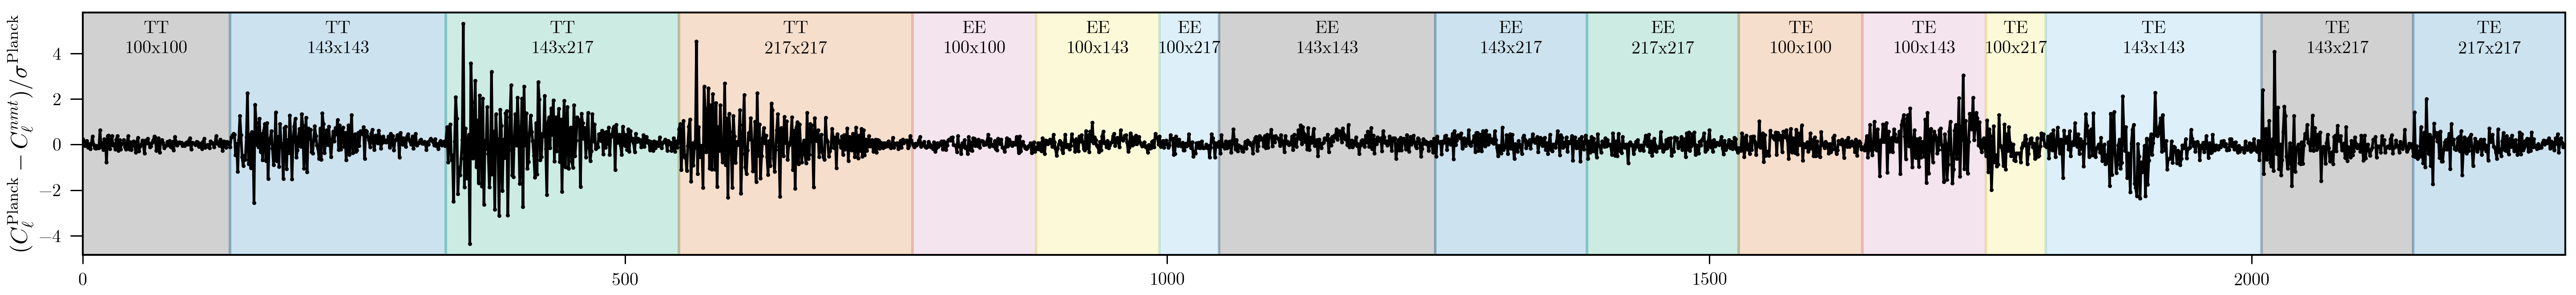

In [21]:
plt.figure(figsize=(50,5))
plt.plot( (mega_vector - planck_dl) / planck_dl_err, 'k.-' )

current_pos = 0
for i, (r, recipe) in enumerate(zip(cross_spec_list, total_recipe)):
    
    ch1, ch2 = r['spec'][0], r['spec'][1]
    f1, f2 = r['f1'], r['f2']
    
    plt.gca().axvspan(current_pos, current_pos + len(recipe), alpha=0.2, color=col[i % len(col)])
    current_pos += len(recipe)
    plt.text(current_pos - len(recipe)/2, 4.9, f'{ch1}{ch2}', horizontalalignment='center', fontsize=20)
    plt.text(current_pos - len(recipe)/2, 4, f'{f1}x{f2}', horizontalalignment='center', fontsize=20)
    
plt.xlim(0, 2289)
plt.ylabel('$(C_{\ell}^{\mathrm{Planck}} - C_{\ell}^{nmt}) / \sigma^{\mathrm{Planck}}$')

In [38]:
! pwd

/home/zequnl/Installs/PSpipe/project/Planck/notebooks


In [22]:
bbl_test = np.load('nmtbbl/bbl_TT_143x143.npy')

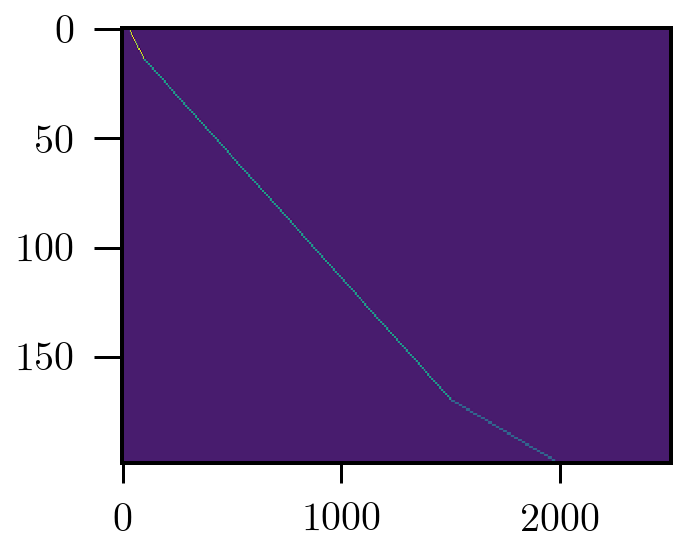

In [23]:
plt.imshow(bbl_test, aspect=10)

In [249]:
bbl_test.shape

(136, 2509)